<a href="https://colab.research.google.com/github/tamarm/Amateurs-in-the-Dataverse/blob/main/Theft_cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [2]:
path = '/content/drive/MyDrive/Academia/degrees/MA in UofT/Courses/CME538: Data Science/Team Amateurs in the Dataverse/data'


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import package and set defaults

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd


In [5]:
from shapely.geometry import MultiPoint,Point



In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)



##Geospatial shared resources

In [7]:
point_zero = MultiPoint([Point(0, 0)])


In [8]:
def change_crs(df, crs=3347):
  print("Valid rows before crs change:",len(df[df.geometry.is_valid]))
  df.geometry = df.geometry.to_crs(epsg=crs)
  print("Valid rows after crs change:",len(df[df.geometry.is_valid]))
  return df



#Data Analysis

##Theft data


In [9]:
name = "car_with_n_and_p.json"
car = gpd.read_file(f"{path}/{name}")
car.head()

,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,HOOD_158,year_month,index_right,_id,neighbourhood_id,neighbourhood_name,CLASSIFICATION,CLASSIFICATION_CODE,neighborhood_area,park_area,park_density,park_count,closest_park_index,closest_park_name,closest_park_distance,closest_park_category,closest_park_type,geometry
0,GO-20141263029,2014-01-01,2014.00,January,1.00,1.00,Wednesday,15.00,D22,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,161,2014-01,44.00,45.00,161,Humber Bay Shores,Not an NIA or Emerging Neighbourhood,NA,1656622.57,456033.16,27.53,15.00,1568,TRCA LANDS ( 32),99.67,Near Park,Neighbourhood,MULTIPOINT (7217540.389 923750.421)
1,GO-20141261694,2014-01-01,2014.00,January,1.00,1.00,Wednesday,1.00,D51,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,Theft From Motor Vehicle Under,166,2014-01,39.00,40.00,166,St Lawrence-East Bayfront-The Islands,Not an NIA or Emerging Neighbourhood,NA,11875224.03,2792382.24,23.51,53.00,1890,BERCZY PARK,153.29,Near Park,Parkette,MULTIPOINT (7225614.616 928062.742)
2,GO-20149000046,2014-01-01,2014.00,January,1.00,1.00,Wednesday,0.00,D14,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft From Motor Vehicle Under,078,2014-01,80.00,81.00,078,Kensington-Chinatown,Not an NIA or Emerging Neighbourhood,NA,1610389.49,59567.09,3.70,10.00,1779,BELLEVUE SQUARE PARK,140.17,Near Park,Parkette,MULTIPOINT (7223387.097 928306.715)
3,GO-20149000033,2014-01-01,2014.00,January,1.00,1.00,Wednesday,3.00,D14,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,081,2014-01,105.00,106.00,081,Trinity-Bellwoods,Not an NIA or Emerging Neighbourhood,NA,1815085.68,188258.20,10.37,8.00,2830,FRED HAMILTON PLAYGROUND,114.46,Near Park,Neighbourhood,MULTIPOINT (7221907.242 928266.306)
4,GO-20141262977,2014-01-01,2014.00,January,1.00,1.00,Wednesday,14.00,D11,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,085,2014-01,102.00,103.00,085,South Parkdale,Neighbourhood Improvement Area,NIA,2400398.26,504977.86,21.04,29.00,1899,SUNNYSIDE BIKE PARK,20.70,In Park,Neighbourhood,MULTIPOINT (7218532.189 925500.512)


In [10]:
car.crs #make sure the right crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
name = "bike_with_n_and_p.json"
bike = gpd.read_file(f"{path}/{name}")
bike.head()

In [ ]:
bike.crs #make sure the right crs

In [ ]:
name = "neighbourhoods_with_park.json"
Neighbourhoods = gpd.read_file(f"{path}/{name}")
Neighbourhoods.head()

In [ ]:
Neighbourhoods.crs

In [ ]:
name = 'parks.json'
parks = gpd.read_file(f"{path}/{name}")
parks.head()

In [ ]:
parks.crs

## DBSCAN

In [ ]:
import folium
from folium import FeatureGroup
import geopandas as gpd
import random

from sklearn.cluster import DBSCAN


In [ ]:
name = "bike_with_n_p.json"
bike = gpd.read_file(f"{path}/{name}")
bike.head()

In [ ]:
from sklearn.cluster import DBSCAN
# Extract coordinates
coords = np.array(list(bike.explode(index_parts=False).geometry.apply(lambda geom: (geom.x, geom.y))))

# Apply DBSCAN
eps = 100  # Distance in meters
min_samples = 5  # Minimum thefts to form a cluster
db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(coords)

# Add cluster labels to the GeoDataFrame
bike['cluster'] = db.labels_

# Plot the results
fig, ax = plt.subplots(figsize=(10, 10))
base = Neighbourhoods.plot(ax=ax, color='white', edgecolor='black')  # Plot neighborhoods
bike[bike['cluster'] != -1].plot(ax=base, column='cluster', cmap='viridis', legend=True, markersize=5)  # Hotspots
bike[bike['cluster'] == -1].plot(ax=base, color='red', markersize=2, label='Noise')  # Noise points
plt.legend()
plt.title("Bike Theft Hotspots")
plt.show()


In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 10))
base = Neighbourhoods.plot(ax=ax, color='white', edgecolor='black')  # Plot neighborhoods
bike[bike['cluster'] != -1].plot(ax=base, column='cluster', cmap='viridis', legend=True, markersize=5)  # Hotspots
bike[bike['cluster'] == -1].plot(ax=base, color='red', markersize=2, label='Noise')  # Noise points
plt.legend()
plt.title("Bike Theft Hotspots")
plt.show()


In [ ]:
# Extract coordinates
coords = np.array(list(car.explode(index_parts=False).geometry.apply(lambda geom: (geom.x, geom.y))))

# Apply DBSCAN
eps = 100  # Distance in meters
min_samples = 5  # Minimum thefts to form a cluster
db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(coords)

# Add cluster labels to the GeoDataFrame
car['cluster'] = db.labels_

# Plot the results
fig, ax = plt.subplots(figsize=(10, 10))
base = Neighbourhoods.plot(ax=ax, color='white', edgecolor='black')  # Plot neighborhoods
car[car['cluster'] != -1].plot(ax=base, column='cluster', cmap='viridis', legend=True, markersize=5)  # Hotspots
car[car['cluster'] == -1].plot(ax=base, color='red', markersize=2, label='Noise')  # Noise points
plt.legend()
plt.title("Car Theft Hotspots")
plt.show()


In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 10))
base = Neighbourhoods.plot(ax=ax, color='white', edgecolor='black')  # Plot neighborhoods
car[car['cluster'] != -1].plot(ax=base, column='cluster', cmap='viridis', legend=True, markersize=5)  # Hotspots
plt.legend()
plt.title("Car Theft Hotspots")
plt.show()


In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 10))
base = Neighbourhoods.plot(ax=ax, color='white', edgecolor='black')  # Plot neighborhoods
bike[bike['cluster'] != -1].plot(ax=base, column='cluster', cmap='viridis', legend=True, markersize=5)  # Hotspots
plt.legend()
plt.title("Bike Theft Hotspots")
plt.show()


In [ ]:
# Plot neighborhoods and clusters
fig, ax = plt.subplots(figsize=(12, 12))
base = Neighbourhoods.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)
parks.plot(ax=base, color='green', alpha=0.4, label='Parks')
bike[bike['cluster'] != -1].plot(ax=base, column='cluster', cmap='viridis',legend=True, markersize=5, label='Clusters')
plt.legend()
plt.title("Theft Clusters and Parks")
plt.show()

In [ ]:
# Plot neighborhoods and clusters
fig, ax = plt.subplots(figsize=(12, 12))
base = Neighbourhoods.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)
parks.plot(ax=base, color='green', alpha=0.4, label='Parks')
car[car['cluster'] != -1].plot(ax=base, column='cluster', cmap='viridis', markersize=5, legend=True)
plt.legend()
plt.title("Theft Clusters and Parks")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
# Extract coordinates
coords = np.array(list(bike.explode(index_parts=False).geometry.apply(lambda geom: (geom.x, geom.y))))

# Apply DBSCAN
eps = 100  # Distance in meters
min_samples = 20  # Minimum thefts to form a cluster
db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(coords)

# Add cluster labels to the GeoDataFrame
bike['cluster'] = db.labels_



In [ ]:
bike_cluster_size = bike['cluster'].value_counts()
bike_cluster_size

In [ ]:
# Ensure data is in WGS 84 CRS
bike_thefts = bike.explode(index_parts=False).to_crs(epsg=4326)
neighborhoods = Neighbourhoods.to_crs(epsg=4326)
parks1 = parks.to_crs(epsg=4326)

# Create a base map centered on your area of interest
center_coords = [bike_thefts.geometry.y.mean(), bike_thefts.geometry.x.mean()]
m = folium.Map(location=center_coords, zoom_start=12)

# Add neighborhoods as polygons
neighborhood_layer = FeatureGroup(name="Neighborhoods")
for _, row in neighborhoods.iterrows():
    folium.GeoJson(row.geometry,
                   style_function=lambda x: {"fillColor": "#ADD8E6", "color": "black", "weight": 1, "fillOpacity": 0.3},
                   tooltip=row['neighbourhood_name']).add_to(neighborhood_layer)
neighborhood_layer.add_to(m)

# Add parks1 as polygons
park_layer = FeatureGroup(name="Parks")
for _, row in parks1.iterrows():
    folium.GeoJson(row.geometry,
                   style_function=lambda x: {"fillColor": "green", "color": "green", "weight": 1, "fillOpacity": 0.5},
                   tooltip=row['AREA_NAME']).add_to(park_layer)
park_layer.add_to(m)

# Add theft clusters
cluster_layer = FeatureGroup(name="Theft Clusters")
colors = ["#"+''.join([random.choice('ABCDEF0123456789') for _ in range(6)]) for _ in range(len(bike_thefts['cluster'].unique()))]

for _, row in bike_thefts[bike_thefts['cluster'] != -1].iterrows():
    cluster_color = colors[int(row['cluster'])]  # Assign a unique color to each cluster
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color,
        fill_opacity=0.8,
        tooltip=f"Cluster: {bike_cluster_size[bike_cluster_size.index==row['cluster']].iloc[0]}"
    ).add_to(cluster_layer)
cluster_layer.add_to(m)

# Add layer control and display the map
folium.LayerControl().add_to(m)
m


In [ ]:
car_cluster_size = car['cluster'].value_counts()
car_cluster_size

In [ ]:
# Ensure data is in WGS 84 CRS
car_thefts = car.explode(index_parts=False).to_crs(epsg=4326)
neighborhoods = Neighbourhoods.to_crs(epsg=4326)
parks1 = parks.to_crs(epsg=4326)

# Create a base map centered on your area of interest
center_coords = [car_thefts.geometry.y.mean(), bike_thefts.geometry.x.mean()]
m = folium.Map(location=center_coords, zoom_start=12)

# Add neighborhoods as polygons
neighborhood_layer = FeatureGroup(name="Neighborhoods")
for _, row in neighborhoods.iterrows():
    folium.GeoJson(row.geometry,
                   style_function=lambda x: {"fillColor": "#ADD8E6", "color": "black", "weight": 1, "fillOpacity": 0.3},
                   tooltip=row['neighbourhood_name']).add_to(neighborhood_layer)
neighborhood_layer.add_to(m)

# Add parks1 as polygons
park_layer = FeatureGroup(name="Parks")
for _, row in parks1.iterrows():
    folium.GeoJson(row.geometry,
                   style_function=lambda x: {"fillColor": "green", "color": "green", "weight": 1, "fillOpacity": 0.5},
                   tooltip=row['AREA_NAME']).add_to(park_layer)
park_layer.add_to(m)

# Add theft clusters
cluster_layer = FeatureGroup(name="Theft Clusters")
colors = ["#"+''.join([random.choice('ABCDEF0123456789') for _ in range(6)]) for _ in range(len(car_thefts['cluster'].unique()))]

for _, row in car_thefts[car_thefts['cluster'] != -1].iterrows():
    cluster_color = colors[int(row['cluster'])]  # Assign a unique color to each cluster
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color,
        fill_opacity=0.8,
        tooltip=f"Cluster: {car_cluster_size[car_cluster_size.index==row['cluster']].values[0]}"
    ).add_to(cluster_layer)
cluster_layer.add_to(m)

# Add layer control and display the map
folium.LayerControl().add_to(m)
m


## Car Park analysis

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
map_5 = folium.Map(location=[43.6426, -79.3871],
                   tiles='cartodbpositron',
                   zoom_start=10)

# Add points to the map
HeatMap(data=list(zip(car.geometry.to_crs(epsg=4326).geometry.explode().y,
                      car.geometry.to_crs(epsg=4326).geometry.explode().x)),
        radius=20).add_to(map_5)

# Display map
map_5

In [ ]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=car, x='OCC_HOUR', y='closest_park_distance')
plt.xlabel("Hour")
plt.ylabel("Park distance")
plt.title("Park distance by hour in the day")
plt.show()


In [ ]:
plt.figure(figsize=(20, 10))

sns.countplot(data=car, x='OCC_HOUR')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Number of thefts by hour in the day")
plt.show()


In [ ]:
plt.figure(figsize=(20, 10))

sns.countplot(data=car, x='OCC_HOUR',hue='closest_park_type')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Number of thefts by hour in the day")
plt.show()


In [ ]:
car['OCC_DAY'].value_counts()

##Park analysis

In [ ]:
bike

In [ ]:
plt.figure(figsize=(10, 6))

monthly_avg = bike.groupby(['OCC_YEAR', 'OCC_MONTH'])['closest_park_distance'].mean().reset_index()

sns.lineplot(data=monthly_avg, x='OCC_MONTH', y='closest_park_distance', hue='OCC_YEAR', palette="coolwarm")

plt.xlabel("Month")
plt.ylabel("Average Distance to Closest Park (meters)")
plt.title("Average Distance to Closest Park by Month, for Each Year")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend(title="Year")
plt.show()


In [ ]:
bike['PRIMARY_OFFENCE'].value_counts().head(50)

In [ ]:
map_6 = folium.Map(location=[43.6426, -79.3871],
                   tiles='cartodbpositron',
                   zoom_start=10)

# Add points to the map
HeatMap(data=list(zip(bike.geometry.to_crs(epsg=4326).geometry.explode().y,
                      bike.geometry.to_crs(epsg=4326).geometry.explode().x)),
        radius=20).add_to(map_6)

# Display map
map_6

# Archive



In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 7.3 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe


In [ ]:
place_name = "Golden Horseshoe, ON, Canada"
place_name = "Toronto, ON, Canada"

area = ox.geocode_to_gdf(place_name)

area

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-79.63928 43.74984, -79.63853 43.749...",-79.64,43.58,-79.11,43.86,323677062,relation,324211,43.65,-79.38,boundary,administrative,12,0.77,city,Toronto,"Toronto, Golden Horseshoe, Ontario, Canada"


<Axes: >

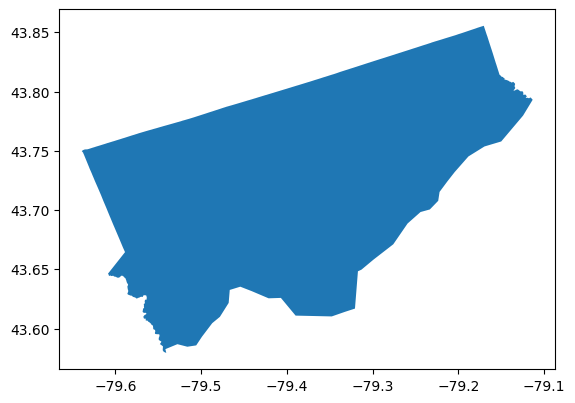

In [ ]:
area.plot()


In [ ]:
tags = {'building': True}

buildings = ox.geometries_from_place(place_name, tags)
buildings.head()


AttributeError: module 'osmnx' has no attribute 'geometries_from_place'

In [ ]:
len(buildings)

In [ ]:
buildings.plot()


In [ ]:
!pip install folium

In [ ]:
import folium
m = folium.Map(location=[43.6426, -79.3871], zoom_start=10)
for _, r in parks.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    geo_j.add_to(m)
m
